# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t90_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,139.747997,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
0,1434.0,1680.0,1948.0,2194.0,2518.0,2706.0,2888.0,3142.0,3273.0,3491.0,...,6074.0,6117.0,5937.0,6032.0,5959.0,5829.0,6054.0,6075.0,6045.0,6017.0
1,1357.0,1719.0,1994.0,2318.0,2515.0,2722.0,2940.0,3099.0,3390.0,3616.0,...,6156.0,6073.0,6086.0,6151.0,6052.0,6187.0,6051.0,6142.0,6093.0,6207.0
2,1297.0,1553.0,2046.0,2260.0,2723.0,2708.0,2936.0,3185.0,3368.0,3725.0,...,6120.0,6223.0,6362.0,6182.0,6302.0,6372.0,6201.0,6125.0,6118.0,6345.0
3,1329.0,1773.0,2020.0,2369.0,2643.0,2884.0,3055.0,3228.0,3561.0,3671.0,...,6454.0,6444.0,6301.0,6480.0,6483.0,6292.0,6204.0,6454.0,6215.0,6174.0
4,1361.0,1867.0,2185.0,2367.0,2733.0,2793.0,3182.0,3280.0,3496.0,3756.0,...,6430.0,6388.0,6522.0,6414.0,6454.0,6526.0,6379.0,6460.0,6360.0,6362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,541.0,696.0,823.0,923.0,984.0,1052.0,1147.0,1190.0,1331.0,1350.0,...,1503.0,1643.0,1752.0,1721.0,1623.0,1659.0,1610.0,1710.0,1638.0,1707.0
1021,568.0,721.0,896.0,963.0,1117.0,1055.0,1159.0,1236.0,1328.0,1296.0,...,1596.0,1578.0,1635.0,1685.0,1666.0,1655.0,1639.0,1647.0,1678.0,1636.0
1022,520.0,717.0,744.0,882.0,939.0,1071.0,1098.0,1195.0,1237.0,1413.0,...,1572.0,1628.0,1621.0,1601.0,1798.0,1640.0,1627.0,1569.0,1599.0,1625.0
1023,546.0,710.0,870.0,880.0,1075.0,1101.0,1140.0,1231.0,1375.0,1406.0,...,1708.0,1565.0,1783.0,1650.0,1675.0,1586.0,1623.0,1667.0,1683.0,1659.0


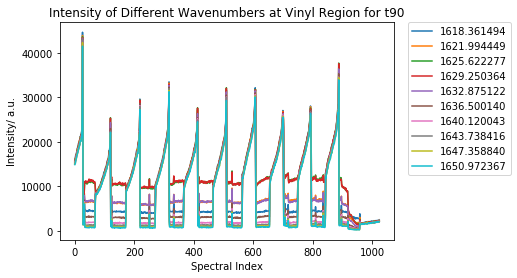

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t90')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.250364'] --> When using loc.
# df.columns.get_loc('1629.250364') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.250364'. Use relevant parameter for iloc and loc respectively.

# Filter Relevant Spectra

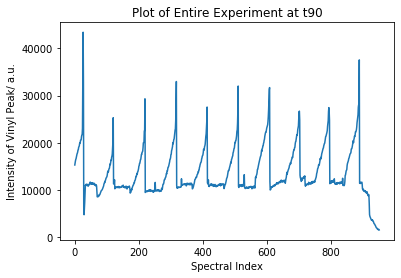

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:950,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t90')
plt.show()

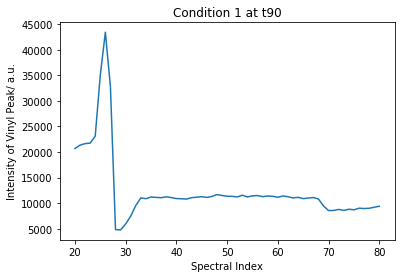

In [6]:
# Condition
df.loc[20:80,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t90')
plt.show()

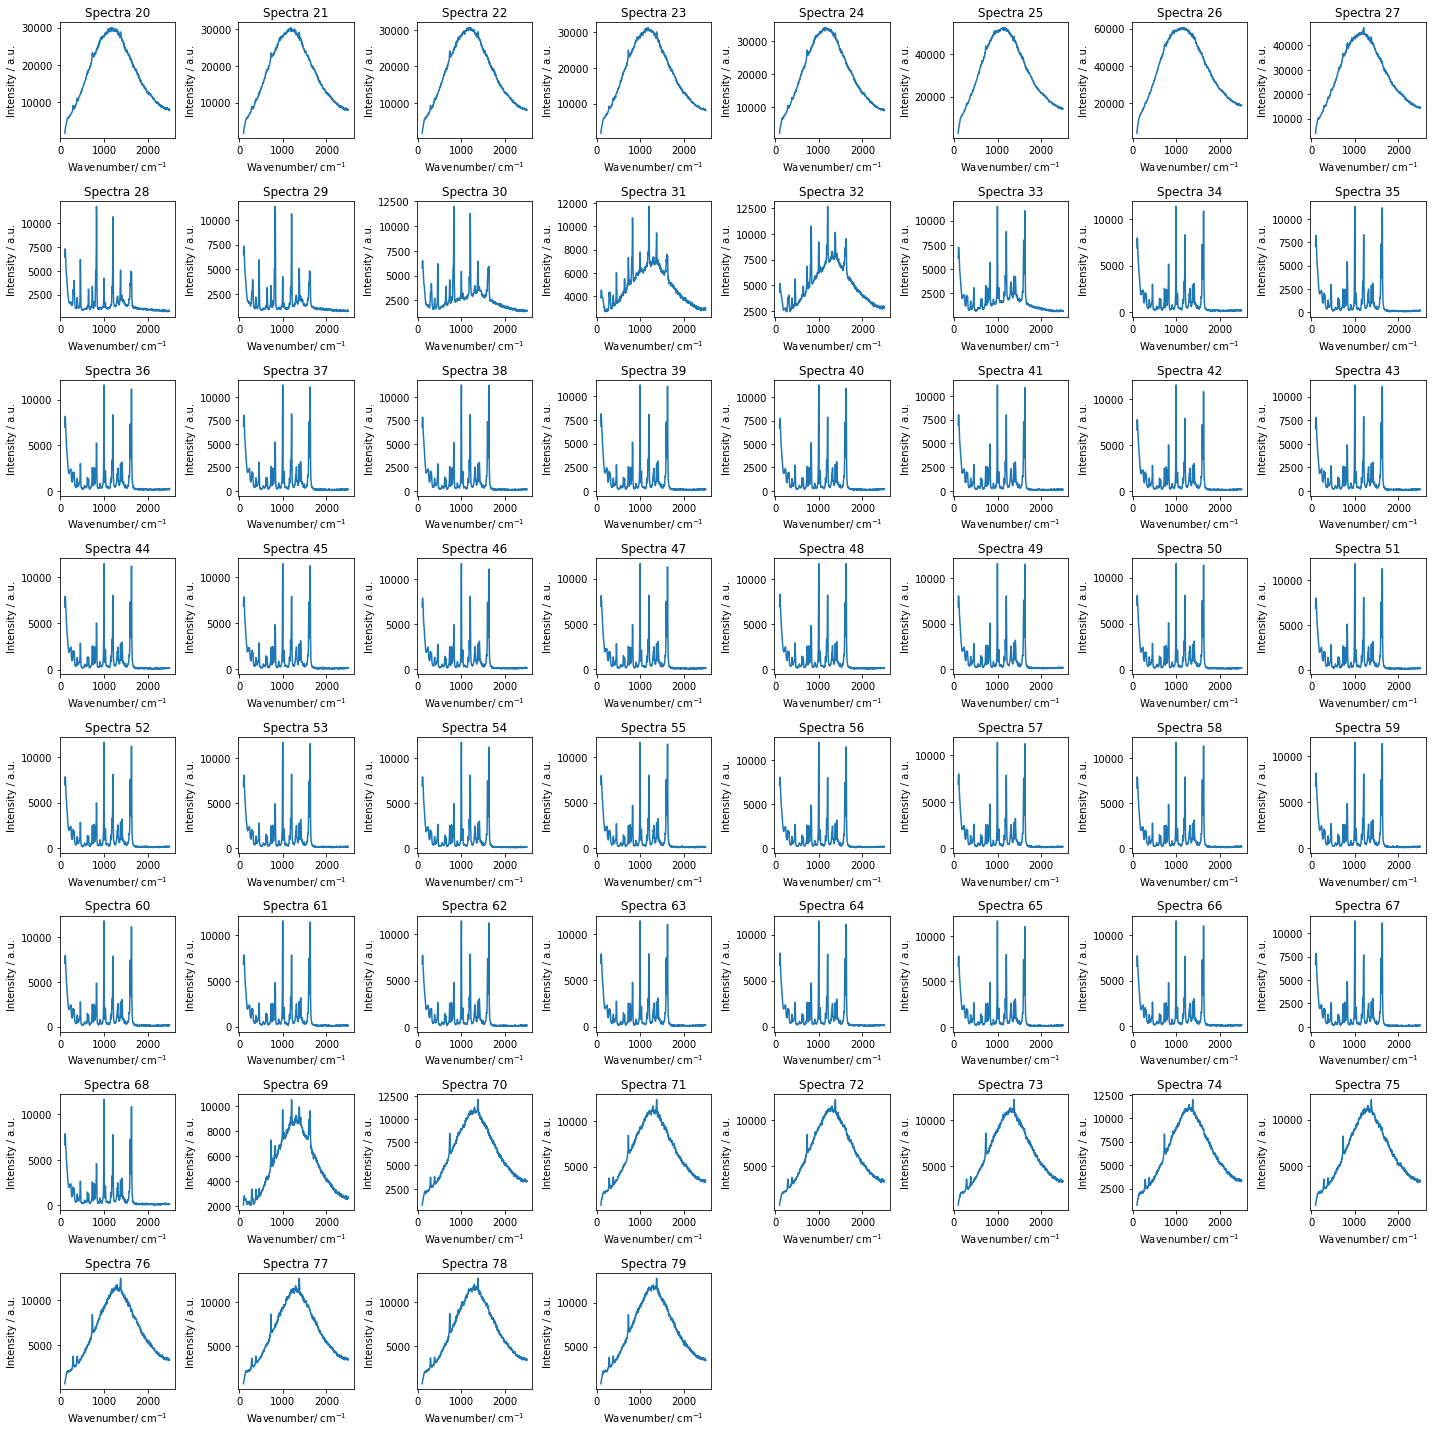

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(20, 80):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-19))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[50:64, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =10)
condition1_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
50,10,6996.0,7895.0,8063.0,7680.0,7154.0,6601.0,6017.0,5641.0,5149.0,...,171.0,164.0,194.0,167.0,166.0,217.0,159.0,165.0,152.0,150.0
51,10,6873.0,7913.0,8032.0,7884.0,7141.0,6651.0,6119.0,5695.0,5349.0,...,163.0,152.0,139.0,159.0,183.0,191.0,159.0,117.0,98.0,170.0
52,10,6950.0,7792.0,7852.0,7734.0,7141.0,6570.0,6010.0,5544.0,5299.0,...,133.0,158.0,147.0,180.0,193.0,187.0,119.0,174.0,167.0,189.0
53,10,6803.0,7710.0,8078.0,7790.0,7236.0,6633.0,5971.0,5525.0,5261.0,...,122.0,144.0,141.0,200.0,164.0,147.0,116.0,133.0,173.0,136.0
54,10,6927.0,7890.0,7936.0,7860.0,7272.0,6611.0,6219.0,5426.0,5154.0,...,143.0,129.0,184.0,173.0,198.0,172.0,149.0,139.0,168.0,137.0
55,10,6959.0,7886.0,7960.0,7653.0,7101.0,6572.0,6175.0,5539.0,5359.0,...,136.0,196.0,117.0,132.0,156.0,149.0,117.0,157.0,179.0,140.0
56,10,7145.0,7882.0,8040.0,7603.0,7254.0,6654.0,6030.0,5538.0,5156.0,...,206.0,140.0,165.0,177.0,140.0,156.0,128.0,176.0,154.0,223.0
57,10,6926.0,7648.0,7992.0,7728.0,7229.0,6505.0,5941.0,5523.0,5155.0,...,143.0,178.0,163.0,169.0,165.0,175.0,116.0,149.0,159.0,158.0
58,10,6702.0,7926.0,7884.0,7775.0,7175.0,6521.0,6013.0,5558.0,5172.0,...,181.0,131.0,194.0,107.0,201.0,171.0,164.0,150.0,137.0,187.0
59,10,6709.0,7645.0,8127.0,7731.0,7157.0,6480.0,6051.0,5694.0,5296.0,...,144.0,124.0,155.0,179.0,228.0,231.0,146.0,122.0,155.0,150.0


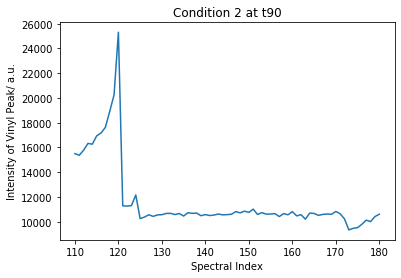

In [9]:
# Condition
df.loc[110:180,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t90')
plt.show()

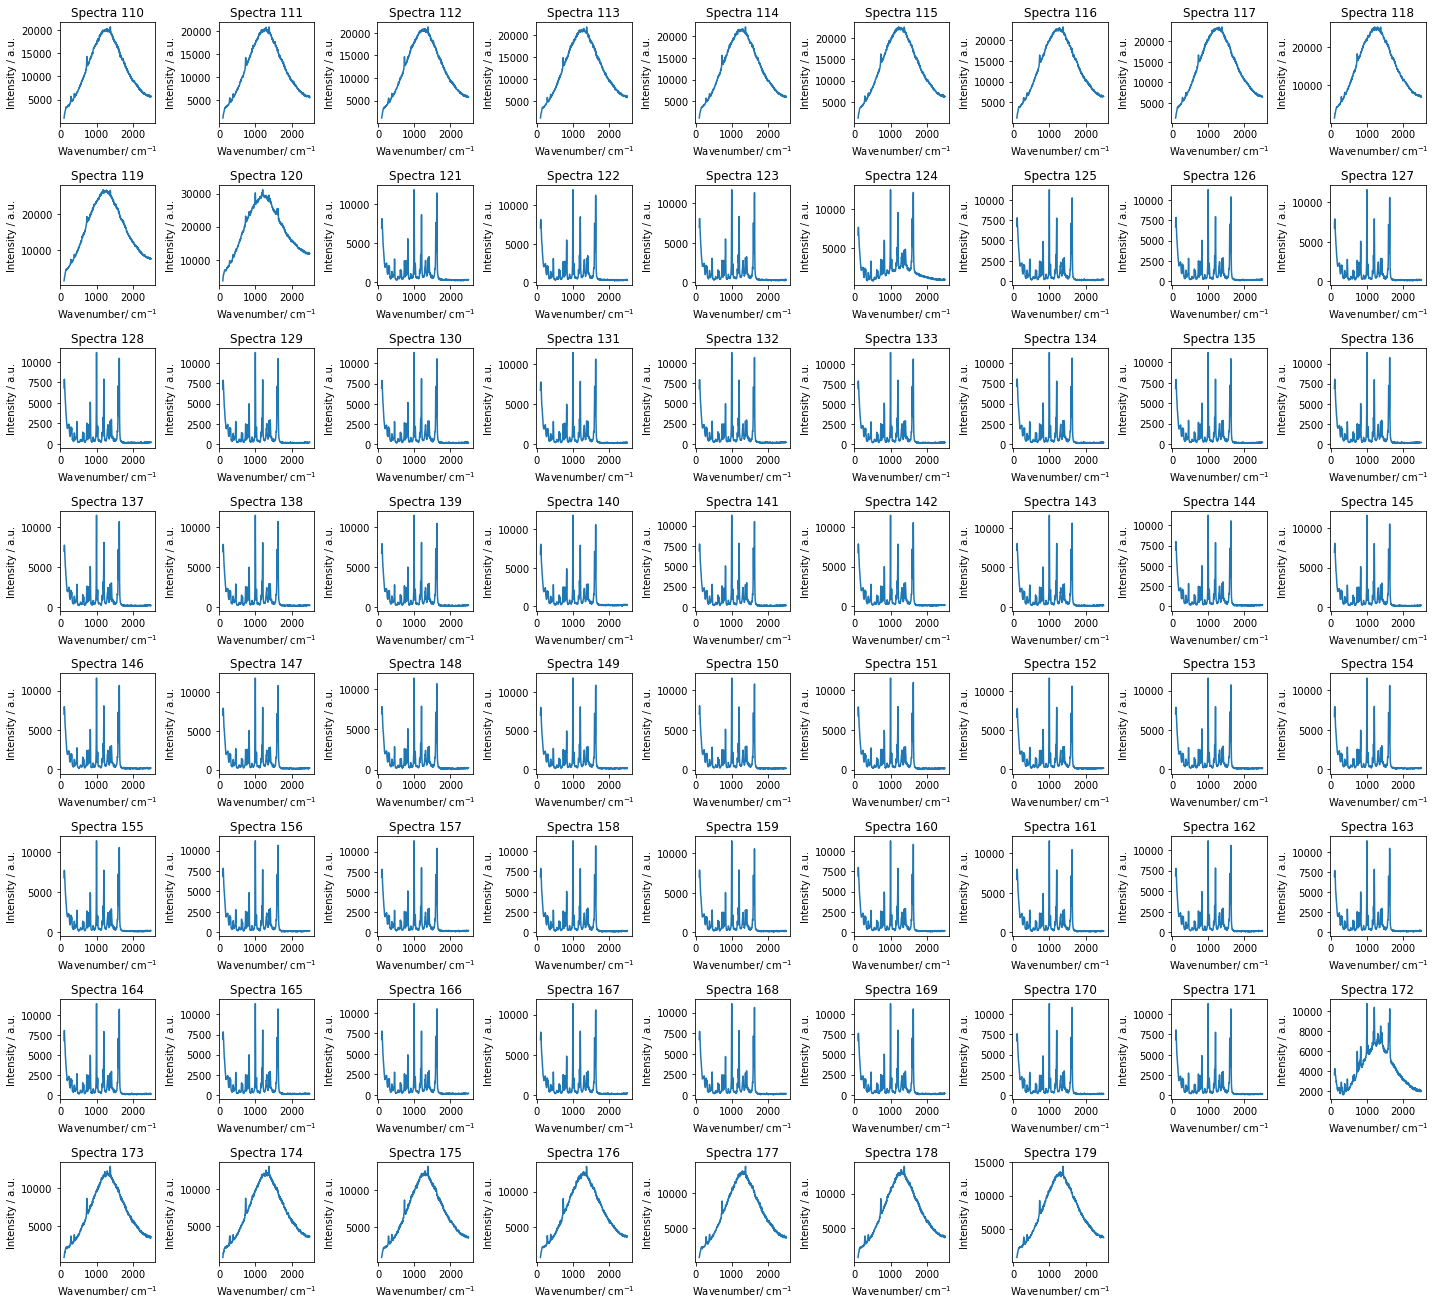

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(110, 180):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(9,9,(i-109))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[150:164, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =11)
condition2_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
150,11,6991.0,7676.0,8029.0,7681.0,7187.0,6736.0,5909.0,5589.0,5314.0,...,163.0,179.0,157.0,169.0,229.0,189.0,168.0,176.0,193.0,142.0
151,11,6812.0,7880.0,7919.0,7628.0,7234.0,6530.0,5731.0,5464.0,5211.0,...,129.0,151.0,194.0,130.0,162.0,178.0,120.0,133.0,125.0,206.0
152,11,6701.0,7533.0,7809.0,7799.0,7133.0,6522.0,5838.0,5617.0,5211.0,...,207.0,137.0,229.0,185.0,216.0,177.0,139.0,146.0,138.0,171.0
153,11,7068.0,7713.0,7884.0,7626.0,7114.0,6543.0,5884.0,5543.0,5229.0,...,148.0,159.0,182.0,199.0,194.0,158.0,105.0,181.0,98.0,165.0
154,11,6697.0,7760.0,7948.0,7646.0,7047.0,6461.0,5877.0,5287.0,5146.0,...,89.0,144.0,180.0,157.0,217.0,152.0,107.0,142.0,173.0,154.0
155,11,6834.0,7642.0,7747.0,7626.0,7054.0,6416.0,5841.0,5537.0,5221.0,...,139.0,165.0,177.0,233.0,192.0,182.0,152.0,171.0,158.0,206.0
156,11,6851.0,7677.0,7834.0,7641.0,6987.0,6444.0,5805.0,5488.0,5341.0,...,140.0,155.0,177.0,127.0,163.0,181.0,152.0,129.0,172.0,182.0
157,11,6810.0,7598.0,7806.0,7568.0,6928.0,6504.0,5895.0,5568.0,5112.0,...,137.0,104.0,179.0,99.0,191.0,193.0,143.0,188.0,176.0,186.0
158,11,6858.0,7610.0,7872.0,7532.0,7181.0,6610.0,5849.0,5502.0,5060.0,...,178.0,168.0,189.0,164.0,198.0,201.0,110.0,163.0,99.0,219.0
159,11,7005.0,7793.0,7858.0,7769.0,7028.0,6497.0,6041.0,5478.0,5129.0,...,179.0,169.0,192.0,105.0,151.0,240.0,108.0,187.0,153.0,166.0


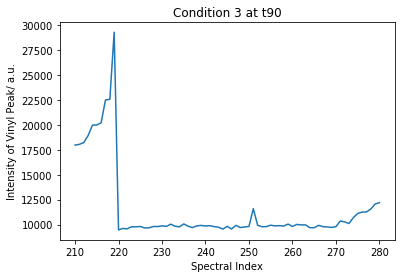

In [12]:
# Condition
df.loc[210:280,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t90')
plt.show()

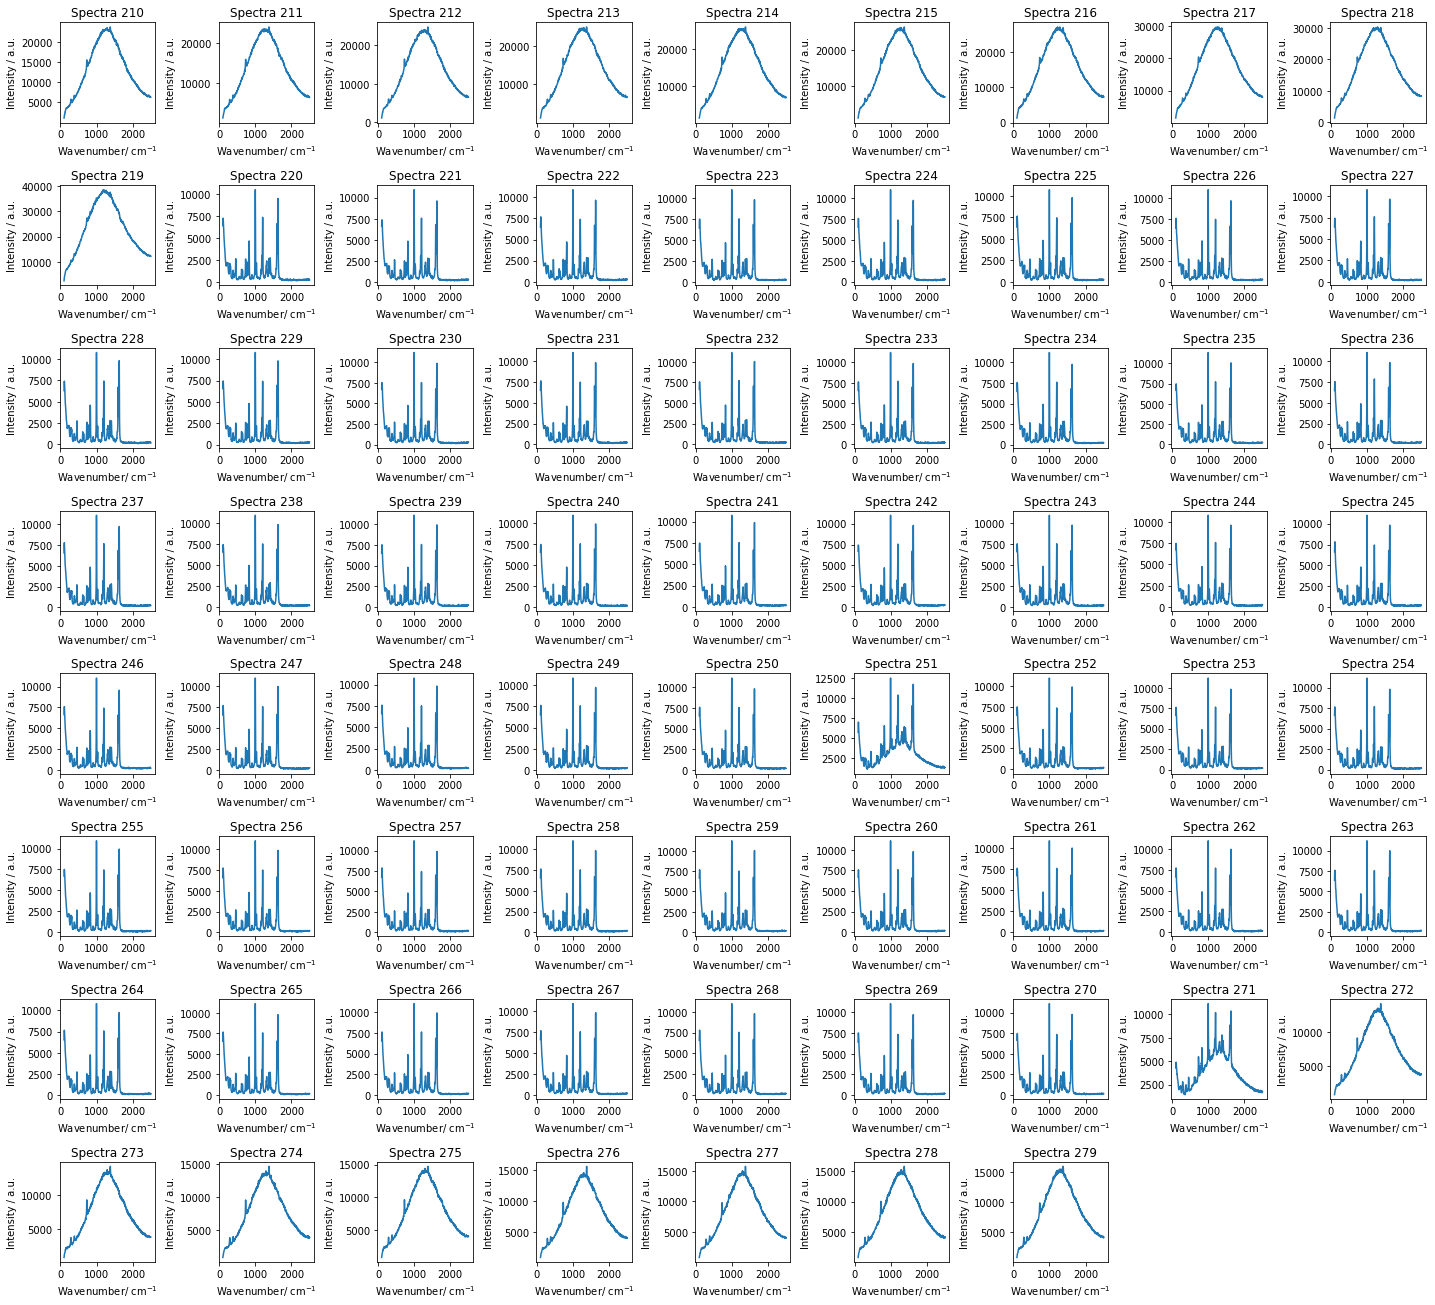

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(210, 280):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(9,9,(i-209))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[253:267, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =12)
condition3_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
253,12,6618.0,7366.0,7594.0,7397.0,6778.0,6332.0,5731.0,5276.0,5000.0,...,150.0,174.0,171.0,185.0,236.0,177.0,168.0,216.0,167.0,172.0
254,12,6615.0,7406.0,7643.0,7501.0,6801.0,6516.0,5681.0,5115.0,4873.0,...,192.0,133.0,220.0,160.0,207.0,149.0,174.0,147.0,195.0,178.0
255,12,6699.0,7512.0,7499.0,7414.0,6884.0,6356.0,5639.0,5245.0,4912.0,...,135.0,151.0,143.0,211.0,209.0,185.0,163.0,135.0,120.0,188.0
256,12,6585.0,7748.0,7600.0,7389.0,6883.0,6160.0,5573.0,5288.0,4833.0,...,147.0,145.0,186.0,112.0,178.0,199.0,151.0,204.0,152.0,194.0
257,12,6739.0,7540.0,7875.0,7287.0,6773.0,6270.0,5754.0,5367.0,4879.0,...,190.0,119.0,203.0,222.0,252.0,217.0,131.0,124.0,156.0,178.0
258,12,6588.0,7554.0,7639.0,7384.0,6969.0,6305.0,6004.0,5073.0,4987.0,...,160.0,143.0,187.0,171.0,223.0,144.0,117.0,147.0,163.0,191.0
259,12,6655.0,7356.0,7680.0,7357.0,6934.0,6179.0,5613.0,5218.0,5101.0,...,93.0,173.0,153.0,164.0,158.0,172.0,133.0,168.0,164.0,158.0
260,12,6691.0,7362.0,7585.0,7451.0,6753.0,6174.0,5509.0,5354.0,4842.0,...,118.0,184.0,151.0,183.0,195.0,196.0,179.0,184.0,146.0,170.0
261,12,6729.0,7296.0,7609.0,7423.0,6755.0,6287.0,5893.0,5392.0,5045.0,...,173.0,114.0,197.0,162.0,173.0,126.0,142.0,98.0,164.0,172.0
262,12,6659.0,7655.0,7716.0,7506.0,7117.0,6024.0,5799.0,5167.0,4990.0,...,147.0,117.0,168.0,140.0,189.0,181.0,141.0,180.0,138.0,162.0


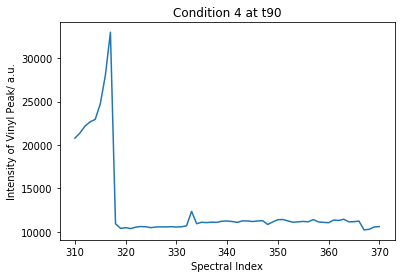

In [15]:
# Condition
df.loc[310:370,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t90')
plt.show()

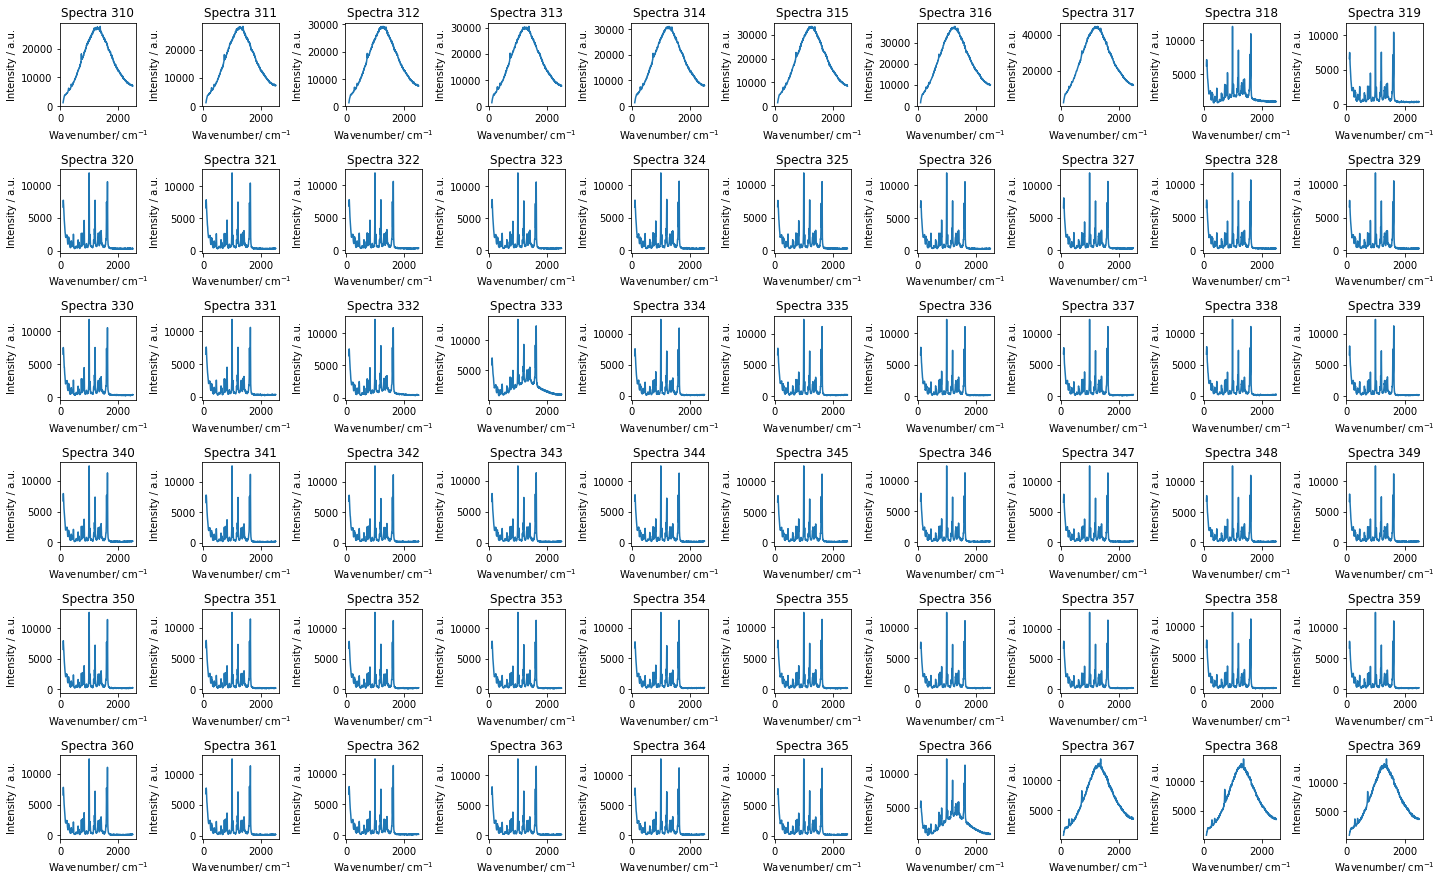

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(310, 370):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-309))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[350:364, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =13)
condition4_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
350,13,6508.0,7553.0,7921.0,7437.0,7132.0,6396.0,6036.0,5531.0,4998.0,...,139.0,132.0,182.0,169.0,176.0,250.0,131.0,145.0,159.0,172.0
351,13,6750.0,7678.0,7932.0,7434.0,7017.0,6365.0,5881.0,5448.0,4977.0,...,152.0,156.0,197.0,176.0,228.0,146.0,138.0,141.0,202.0,164.0
352,13,6698.0,7387.0,7843.0,7608.0,7091.0,6443.0,5970.0,5392.0,5225.0,...,127.0,136.0,152.0,200.0,167.0,189.0,130.0,195.0,132.0,182.0
353,13,6769.0,7374.0,7885.0,7732.0,7116.0,6602.0,5877.0,5373.0,5096.0,...,204.0,136.0,221.0,158.0,202.0,177.0,120.0,179.0,175.0,157.0
354,13,6718.0,7543.0,7671.0,7533.0,6915.0,6439.0,5921.0,5572.0,5076.0,...,173.0,185.0,189.0,147.0,183.0,185.0,203.0,143.0,164.0,211.0
355,13,6704.0,7463.0,7850.0,7514.0,7085.0,6378.0,5808.0,5420.0,5177.0,...,141.0,135.0,193.0,160.0,208.0,195.0,136.0,193.0,170.0,142.0
356,13,6698.0,7635.0,7643.0,7605.0,6923.0,6496.0,5990.0,5507.0,5059.0,...,119.0,158.0,202.0,169.0,211.0,209.0,125.0,180.0,174.0,170.0
357,13,6783.0,7670.0,7932.0,7599.0,7268.0,6510.0,5928.0,5503.0,5152.0,...,115.0,156.0,181.0,172.0,186.0,209.0,109.0,186.0,120.0,132.0
358,13,6623.0,7609.0,7794.0,7568.0,6988.0,6377.0,5992.0,5301.0,5095.0,...,173.0,165.0,192.0,147.0,161.0,194.0,154.0,164.0,183.0,116.0
359,13,6692.0,7756.0,7776.0,7505.0,6995.0,6304.0,5846.0,5366.0,5091.0,...,144.0,155.0,181.0,204.0,187.0,149.0,168.0,149.0,124.0,156.0


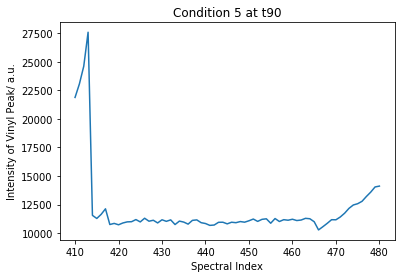

In [18]:
# Condition
df.loc[410:480,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t90')
plt.show()

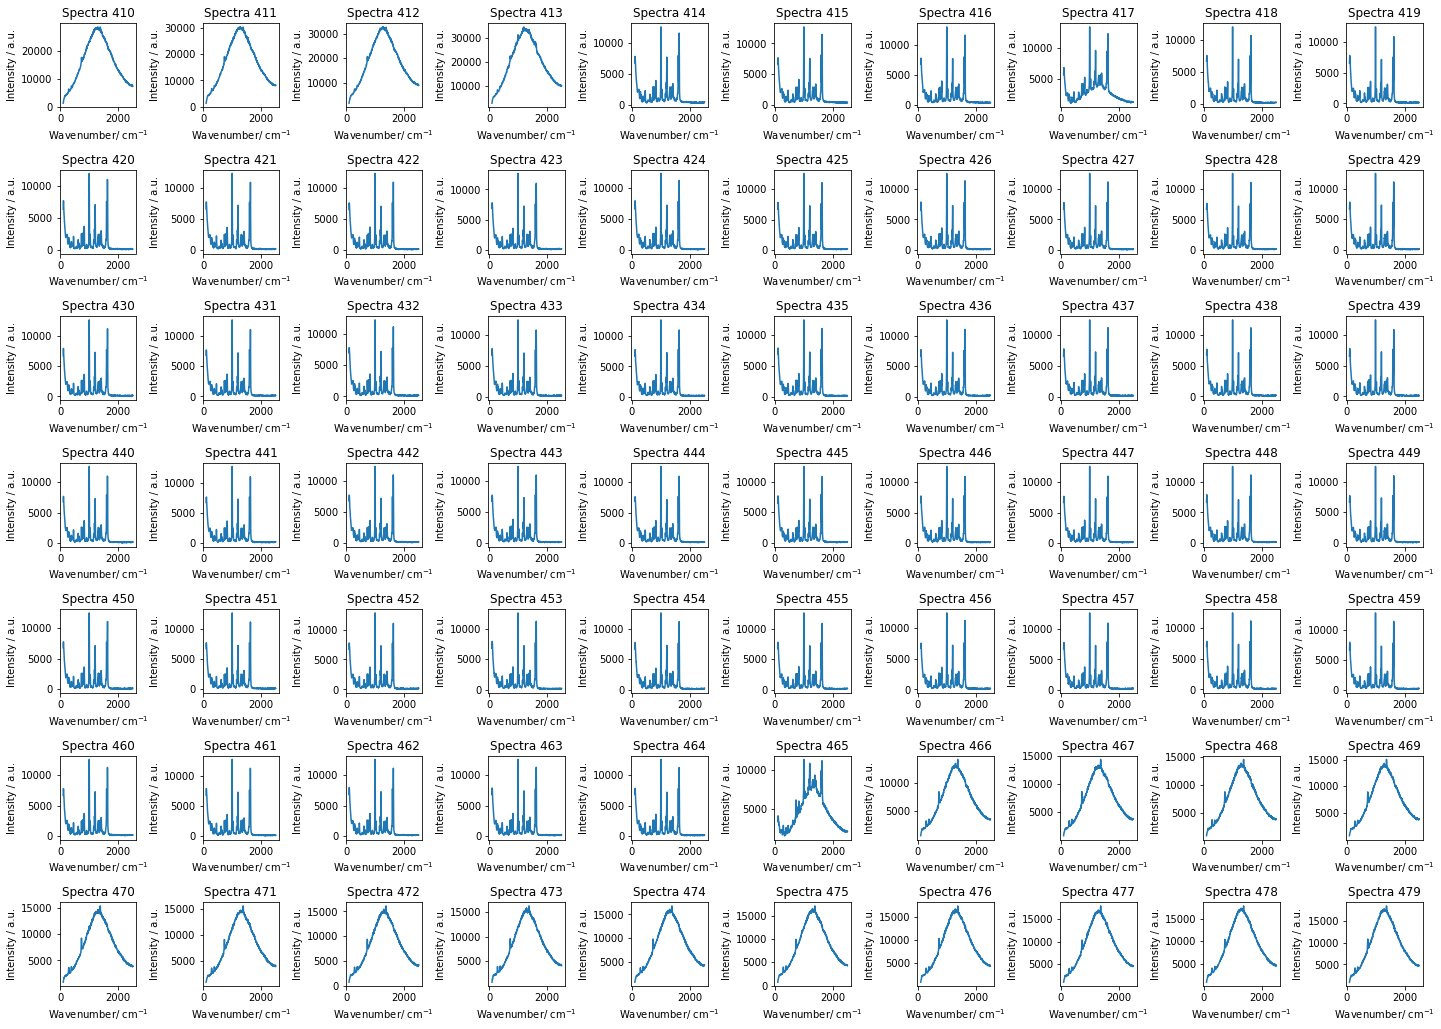

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(410, 480):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-409))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[445:459, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =14)
condition5_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
445,14,6504.0,7439.0,7674.0,7586.0,7011.0,6318.0,5891.0,5439.0,5035.0,...,149.0,134.0,171.0,178.0,172.0,203.0,133.0,228.0,161.0,182.0
446,14,6673.0,7631.0,7749.0,7659.0,6885.0,6352.0,5723.0,5408.0,5285.0,...,94.0,143.0,165.0,129.0,161.0,177.0,141.0,117.0,142.0,166.0
447,14,6711.0,7414.0,7706.0,7435.0,6895.0,6411.0,5890.0,5437.0,5101.0,...,112.0,169.0,164.0,158.0,158.0,164.0,157.0,140.0,131.0,174.0
448,14,6737.0,7614.0,7887.0,7545.0,7085.0,6502.0,5837.0,5536.0,5198.0,...,152.0,130.0,164.0,222.0,174.0,194.0,123.0,176.0,143.0,201.0
449,14,6675.0,7541.0,7716.0,7432.0,7047.0,6460.0,5713.0,5551.0,5008.0,...,100.0,123.0,155.0,119.0,164.0,129.0,162.0,144.0,126.0,160.0
450,14,6777.0,7631.0,7765.0,7406.0,6890.0,6386.0,6055.0,5507.0,5045.0,...,135.0,111.0,159.0,195.0,172.0,196.0,134.0,134.0,137.0,174.0
451,14,6800.0,7661.0,7763.0,7544.0,7080.0,6546.0,6033.0,5428.0,5062.0,...,171.0,133.0,140.0,169.0,172.0,208.0,93.0,105.0,130.0,128.0
452,14,6715.0,7584.0,7752.0,7460.0,7069.0,6448.0,5965.0,5487.0,5081.0,...,188.0,167.0,132.0,163.0,159.0,147.0,153.0,173.0,122.0,204.0
453,14,6779.0,7707.0,7903.0,7770.0,7147.0,6348.0,5931.0,5473.0,5120.0,...,170.0,125.0,167.0,145.0,196.0,173.0,174.0,147.0,193.0,153.0
454,14,6715.0,7781.0,7738.0,7474.0,6922.0,6331.0,5958.0,5385.0,5068.0,...,85.0,135.0,161.0,137.0,135.0,214.0,127.0,148.0,134.0,191.0


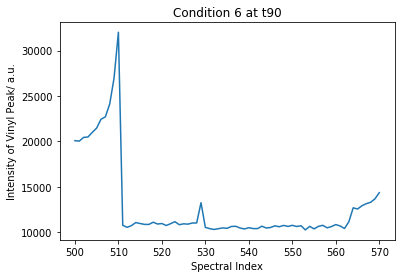

In [21]:
# Condition
df.loc[500:570,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t90')
plt.show()

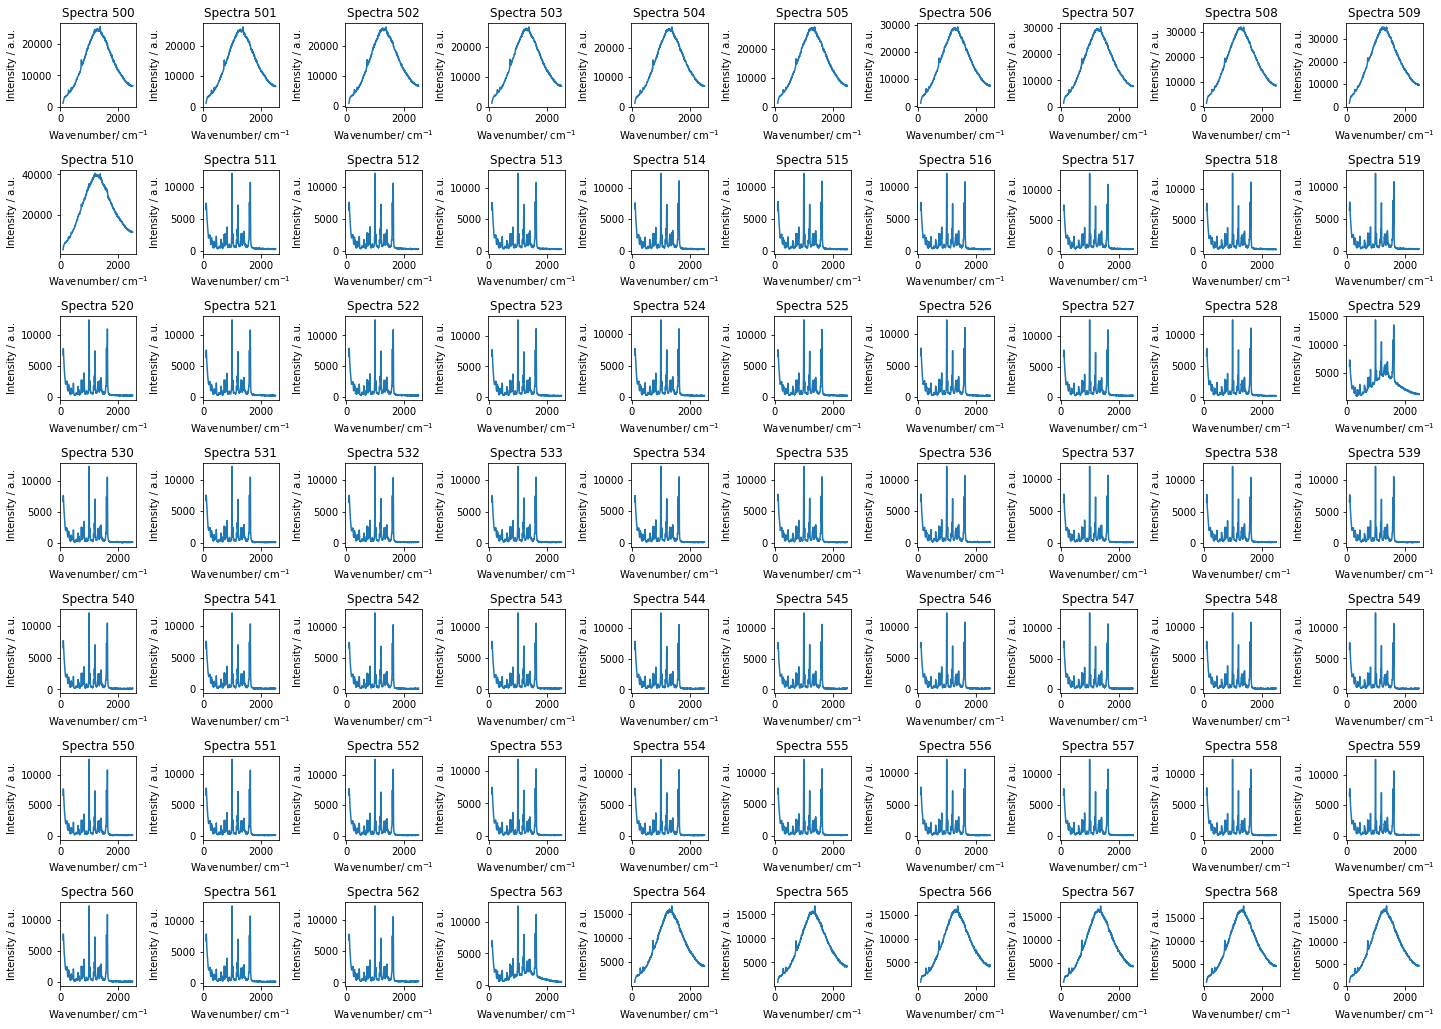

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(500, 570):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-499))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[540:554, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =15)
condition6_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
540,15,6610.0,7538.0,7729.0,7334.0,6832.0,6343.0,5893.0,5193.0,5067.0,...,180.0,131.0,140.0,138.0,155.0,194.0,112.0,184.0,145.0,199.0
541,15,6477.0,7533.0,7647.0,7466.0,6838.0,6347.0,5733.0,5342.0,5016.0,...,156.0,99.0,181.0,179.0,167.0,135.0,148.0,158.0,184.0,132.0
542,15,6692.0,7218.0,7559.0,7420.0,6891.0,6381.0,5715.0,5241.0,4916.0,...,130.0,109.0,139.0,125.0,144.0,200.0,156.0,44.0,123.0,168.0
543,15,6610.0,7532.0,7727.0,7641.0,6813.0,6192.0,5878.0,5417.0,4929.0,...,156.0,180.0,179.0,183.0,172.0,151.0,176.0,188.0,155.0,188.0
544,15,6471.0,7386.0,7776.0,7482.0,6904.0,6324.0,5771.0,5315.0,4981.0,...,130.0,96.0,159.0,169.0,190.0,134.0,141.0,110.0,155.0,167.0
545,15,6681.0,7591.0,7539.0,7471.0,6948.0,6296.0,5826.0,5478.0,4998.0,...,155.0,155.0,157.0,178.0,168.0,235.0,160.0,132.0,143.0,203.0
546,15,6742.0,7506.0,7493.0,7190.0,6928.0,6398.0,5687.0,5364.0,4923.0,...,109.0,148.0,188.0,144.0,151.0,129.0,147.0,124.0,163.0,153.0
547,15,6888.0,7674.0,7843.0,7341.0,6780.0,6597.0,5818.0,5463.0,5110.0,...,166.0,79.0,132.0,86.0,130.0,111.0,111.0,100.0,144.0,140.0
548,15,6646.0,7496.0,7674.0,7482.0,6936.0,6388.0,5828.0,5351.0,4921.0,...,134.0,116.0,171.0,154.0,232.0,176.0,124.0,126.0,150.0,180.0
549,15,6468.0,7548.0,7566.0,7414.0,7054.0,6394.0,5871.0,5318.0,5084.0,...,135.0,114.0,117.0,154.0,190.0,191.0,144.0,182.0,129.0,168.0


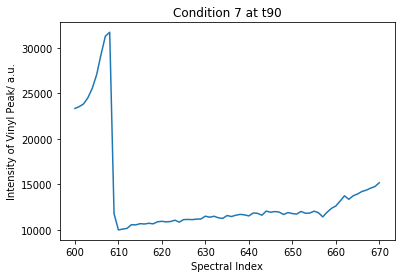

In [24]:
# Condition
df.loc[600:670,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t90')
plt.show()

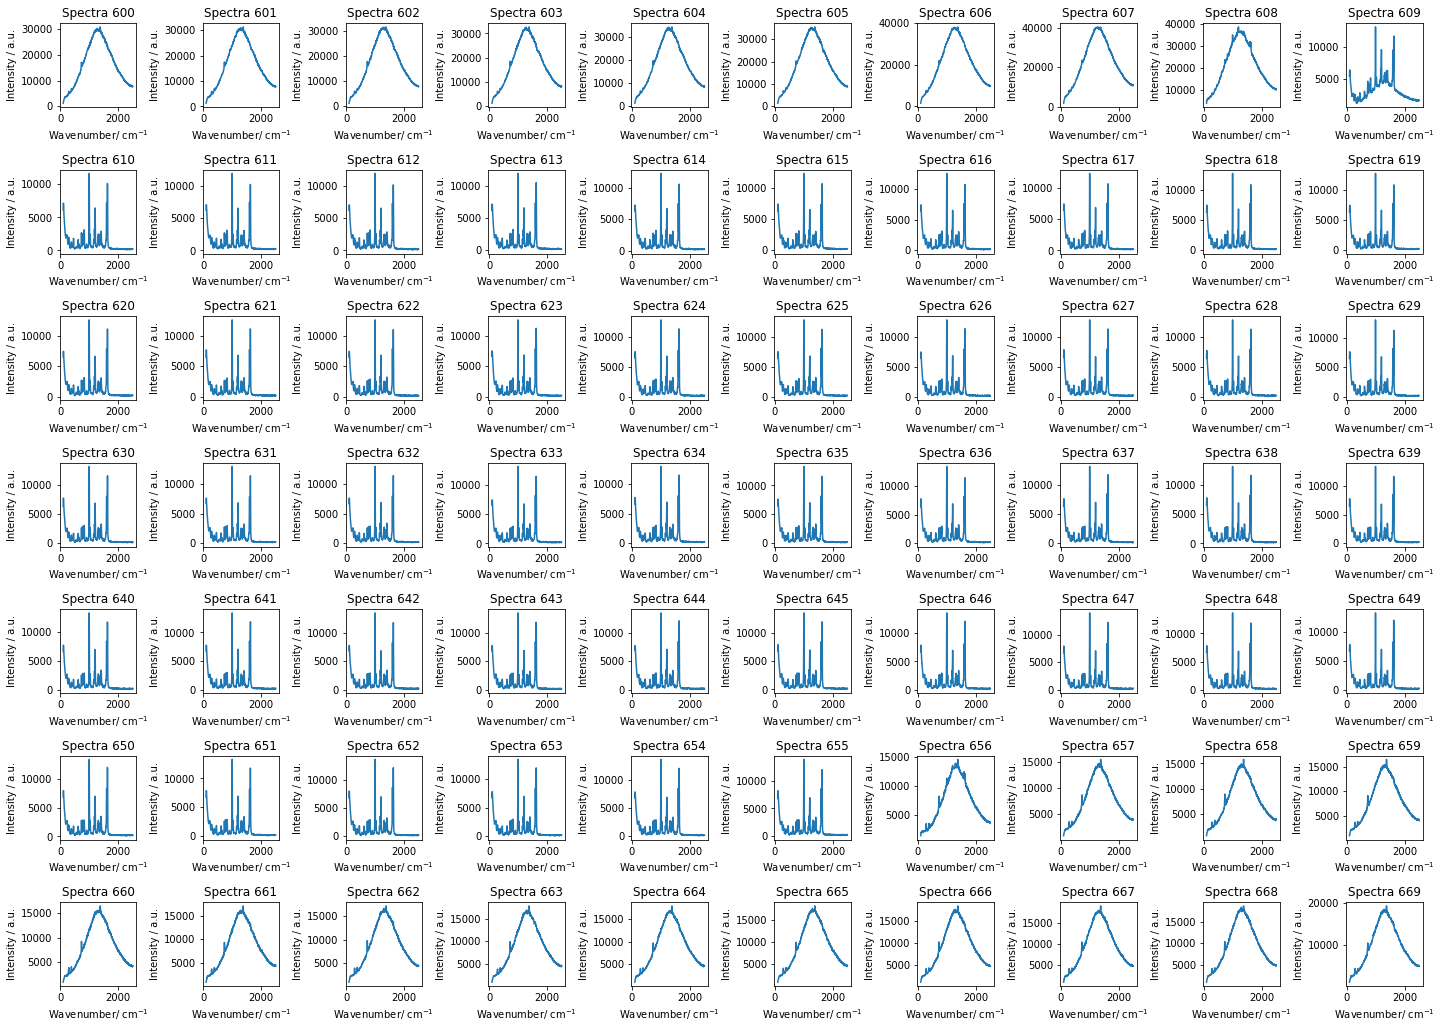

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(600, 670):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-599))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[635:649, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =16)
condition7_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
635,16,6515.0,7394.0,7633.0,7455.0,6901.0,6516.0,6009.0,5441.0,5106.0,...,149.0,189.0,272.0,230.0,271.0,255.0,181.0,221.0,177.0,202.0
636,16,6384.0,7594.0,7766.0,7545.0,7002.0,6607.0,5966.0,5310.0,4993.0,...,200.0,179.0,230.0,220.0,172.0,235.0,179.0,176.0,197.0,233.0
637,16,6362.0,7450.0,7604.0,7607.0,7053.0,6390.0,6048.0,5386.0,4982.0,...,152.0,188.0,235.0,212.0,222.0,243.0,182.0,197.0,237.0,156.0
638,16,6610.0,7272.0,7836.0,7381.0,6927.0,6491.0,5791.0,5504.0,5130.0,...,177.0,201.0,232.0,213.0,268.0,240.0,127.0,198.0,176.0,217.0
639,16,6465.0,7728.0,7768.0,7462.0,7130.0,6377.0,5927.0,5435.0,5094.0,...,191.0,185.0,208.0,200.0,243.0,183.0,169.0,164.0,160.0,245.0
640,16,6664.0,7544.0,7751.0,7517.0,7002.0,6459.0,5939.0,5459.0,5249.0,...,157.0,221.0,189.0,232.0,173.0,236.0,140.0,200.0,177.0,239.0
641,16,6689.0,7650.0,7781.0,7617.0,7031.0,6408.0,5919.0,5651.0,5071.0,...,224.0,207.0,200.0,183.0,199.0,259.0,152.0,191.0,175.0,248.0
642,16,6883.0,7514.0,7802.0,7535.0,7150.0,6630.0,5911.0,5528.0,5208.0,...,199.0,183.0,278.0,186.0,252.0,268.0,176.0,186.0,169.0,214.0
643,16,6798.0,7470.0,7741.0,7542.0,6914.0,6547.0,6113.0,5521.0,5197.0,...,158.0,120.0,175.0,185.0,235.0,216.0,187.0,126.0,147.0,154.0
644,16,6916.0,7637.0,7719.0,7607.0,7252.0,6397.0,6134.0,5581.0,5121.0,...,214.0,150.0,180.0,172.0,221.0,199.0,139.0,126.0,243.0,122.0


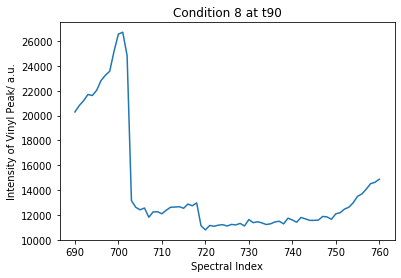

In [27]:
# Condition
df.loc[690:760,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t90')
plt.show()

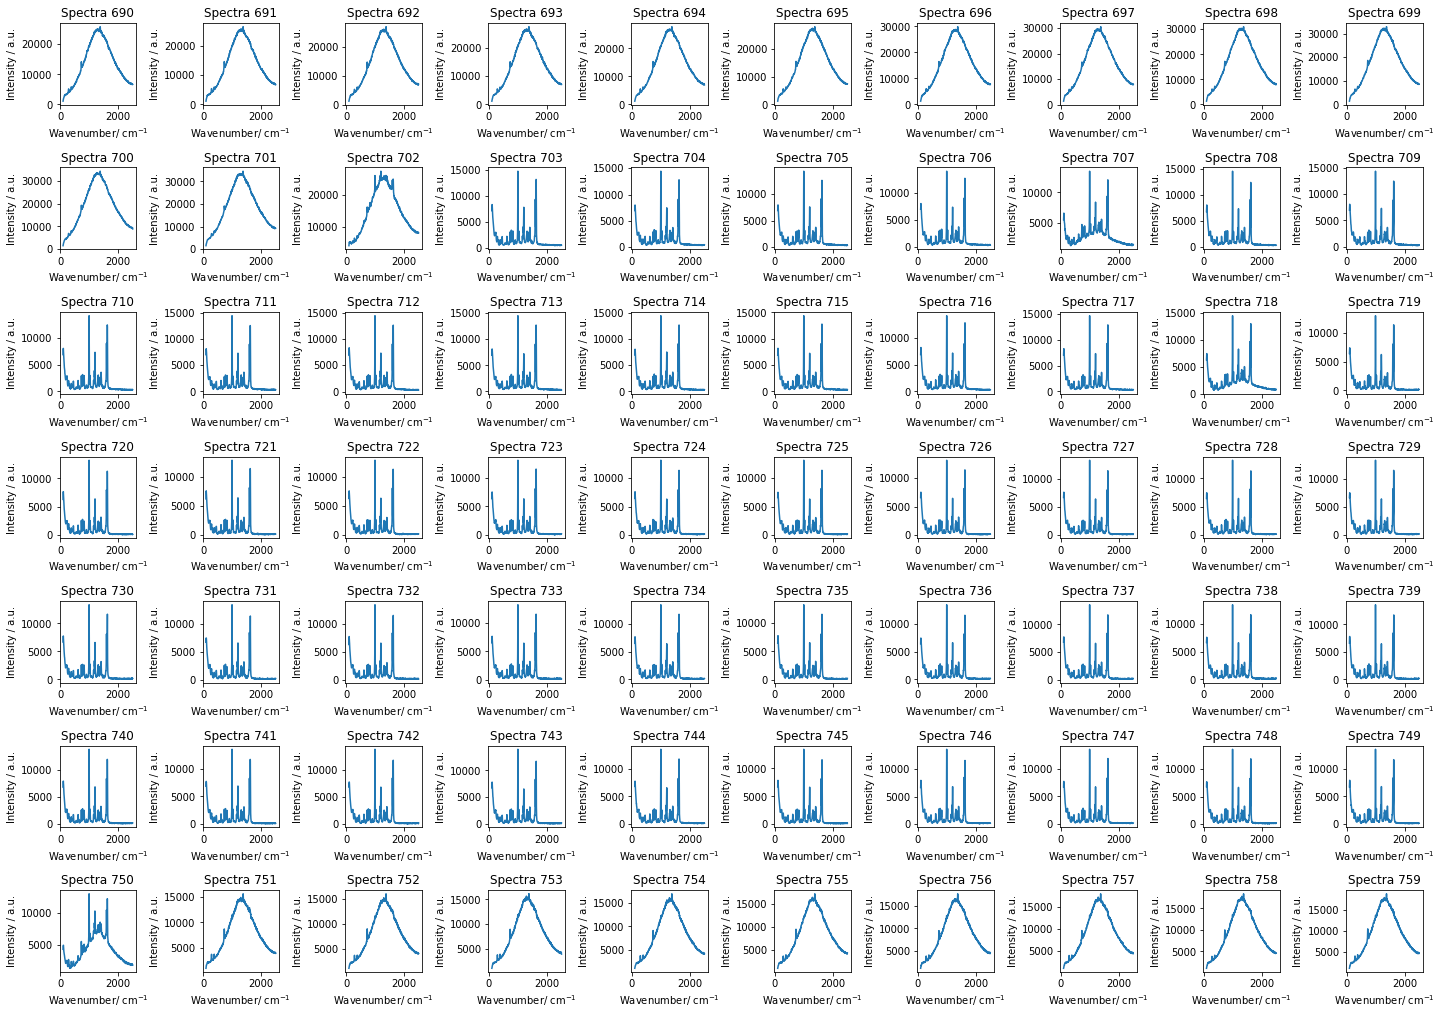

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(690, 760):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-659))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[735:749, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =17)
condition8_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
735,17,6504.0,7466.0,7793.0,7496.0,6791.0,6295.0,5769.0,5428.0,5272.0,...,181.0,163.0,209.0,159.0,165.0,155.0,129.0,191.0,142.0,214.0
736,17,6477.0,7473.0,7490.0,7370.0,6849.0,6564.0,5936.0,5483.0,5115.0,...,139.0,165.0,168.0,165.0,162.0,184.0,99.0,154.0,162.0,199.0
737,17,6784.0,7701.0,7740.0,7592.0,6854.0,6366.0,5821.0,5497.0,5164.0,...,115.0,167.0,164.0,183.0,217.0,162.0,138.0,173.0,160.0,169.0
738,17,6681.0,7367.0,7618.0,7418.0,7027.0,6457.0,5950.0,5416.0,5015.0,...,112.0,147.0,167.0,174.0,172.0,225.0,126.0,168.0,147.0,236.0
739,17,6592.0,7708.0,7811.0,7509.0,7059.0,6592.0,5928.0,5564.0,5103.0,...,110.0,157.0,156.0,168.0,145.0,194.0,121.0,115.0,142.0,157.0
740,17,6785.0,7413.0,7884.0,7522.0,7130.0,6419.0,5948.0,5535.0,5179.0,...,180.0,76.0,161.0,134.0,216.0,178.0,153.0,125.0,136.0,176.0
741,17,6816.0,7533.0,7678.0,7523.0,7144.0,6512.0,5818.0,5373.0,5057.0,...,152.0,111.0,197.0,141.0,155.0,216.0,98.0,161.0,142.0,141.0
742,17,6845.0,7602.0,7765.0,7732.0,7319.0,6429.0,6067.0,5531.0,5206.0,...,156.0,182.0,134.0,157.0,179.0,152.0,92.0,157.0,69.0,225.0
743,17,6749.0,7603.0,7806.0,7490.0,6849.0,6505.0,5987.0,5496.0,5057.0,...,133.0,142.0,106.0,246.0,167.0,193.0,76.0,177.0,142.0,183.0
744,17,6822.0,7555.0,7769.0,7519.0,6868.0,6279.0,5921.0,5505.0,5119.0,...,127.0,81.0,136.0,80.0,168.0,108.0,145.0,120.0,154.0,120.0


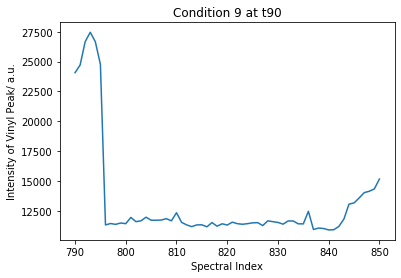

In [30]:
# Condition
df.loc[790:850,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9 at t90')
plt.show()

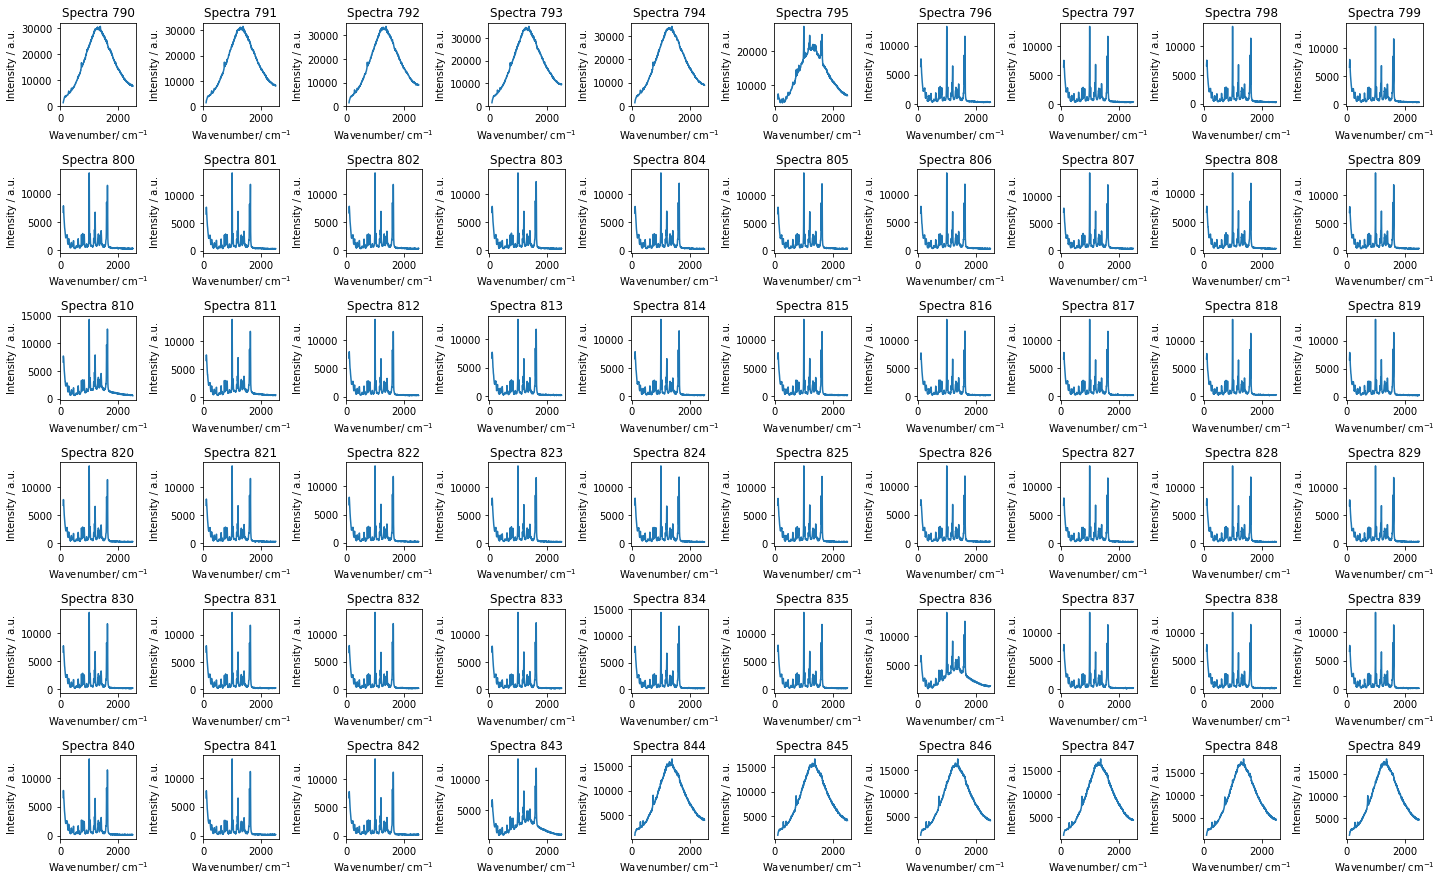

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(790, 850):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-789))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[815:829, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =18)
condition9_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
815,18,6658.0,7424.0,7716.0,7652.0,6834.0,6343.0,5895.0,5442.0,4957.0,...,234.0,241.0,195.0,201.0,219.0,258.0,133.0,229.0,188.0,262.0
816,18,6671.0,7402.0,7759.0,7725.0,6858.0,6399.0,5937.0,5341.0,5006.0,...,274.0,216.0,234.0,228.0,238.0,207.0,220.0,223.0,189.0,257.0
817,18,6669.0,7534.0,7789.0,7605.0,6877.0,6456.0,5876.0,5585.0,5039.0,...,265.0,221.0,225.0,203.0,293.0,262.0,203.0,230.0,229.0,183.0
818,18,6756.0,7538.0,7705.0,7483.0,7185.0,6457.0,5851.0,5466.0,5033.0,...,228.0,209.0,233.0,196.0,224.0,226.0,154.0,185.0,219.0,234.0
819,18,6579.0,7642.0,7873.0,7592.0,7166.0,6468.0,6071.0,5489.0,5106.0,...,270.0,241.0,244.0,283.0,266.0,217.0,243.0,324.0,186.0,275.0
820,18,6767.0,7438.0,7789.0,7567.0,7026.0,6388.0,5810.0,5541.0,5091.0,...,216.0,212.0,287.0,258.0,258.0,264.0,225.0,213.0,211.0,258.0
821,18,6757.0,7663.0,7873.0,7698.0,7216.0,6423.0,5895.0,5552.0,5227.0,...,168.0,235.0,232.0,250.0,251.0,232.0,185.0,200.0,196.0,265.0
822,18,6724.0,7508.0,8042.0,7690.0,7129.0,6553.0,6047.0,5685.0,5228.0,...,194.0,227.0,208.0,238.0,257.0,284.0,163.0,185.0,146.0,187.0
823,18,6794.0,7582.0,8007.0,7752.0,7025.0,6470.0,6083.0,5539.0,5144.0,...,198.0,237.0,248.0,245.0,198.0,278.0,246.0,189.0,184.0,205.0
824,18,6868.0,7450.0,8076.0,7563.0,7092.0,6619.0,6070.0,5471.0,5203.0,...,179.0,196.0,243.0,199.0,252.0,217.0,217.0,213.0,238.0,213.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
50,10,6996.0,7895.0,8063.0,7680.0,7154.0,6601.0,6017.0,5641.0,5149.0,...,171.0,164.0,194.0,167.0,166.0,217.0,159.0,165.0,152.0,150.0
51,10,6873.0,7913.0,8032.0,7884.0,7141.0,6651.0,6119.0,5695.0,5349.0,...,163.0,152.0,139.0,159.0,183.0,191.0,159.0,117.0,98.0,170.0
52,10,6950.0,7792.0,7852.0,7734.0,7141.0,6570.0,6010.0,5544.0,5299.0,...,133.0,158.0,147.0,180.0,193.0,187.0,119.0,174.0,167.0,189.0
53,10,6803.0,7710.0,8078.0,7790.0,7236.0,6633.0,5971.0,5525.0,5261.0,...,122.0,144.0,141.0,200.0,164.0,147.0,116.0,133.0,173.0,136.0
54,10,6927.0,7890.0,7936.0,7860.0,7272.0,6611.0,6219.0,5426.0,5154.0,...,143.0,129.0,184.0,173.0,198.0,172.0,149.0,139.0,168.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,18,6768.0,7591.0,7950.0,7637.0,7076.0,6584.0,5995.0,5546.0,5144.0,...,196.0,251.0,222.0,209.0,323.0,200.0,182.0,209.0,193.0,205.0
826,18,6688.0,7589.0,7634.0,7470.0,7051.0,6605.0,5916.0,5470.0,5142.0,...,236.0,208.0,285.0,220.0,259.0,224.0,233.0,212.0,233.0,239.0
827,18,6711.0,7597.0,8002.0,7730.0,7148.0,6564.0,5983.0,5386.0,5055.0,...,200.0,206.0,280.0,244.0,273.0,233.0,210.0,205.0,230.0,231.0
828,18,6837.0,7669.0,7973.0,7829.0,7037.0,6444.0,5958.0,5517.0,5330.0,...,190.0,265.0,236.0,244.0,258.0,251.0,189.0,296.0,258.0,223.0


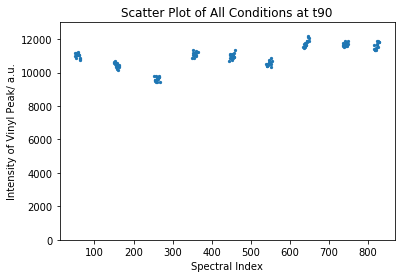

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t90')
plt.ylim(0, 13000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
50,10,6996.0,7895.0,8063.0,7680.0,7154.0,6601.0,6017.0,5641.0,5149.0,...,171.0,164.0,194.0,167.0,166.0,217.0,159.0,165.0,152.0,150.0
51,10,6873.0,7913.0,8032.0,7884.0,7141.0,6651.0,6119.0,5695.0,5349.0,...,163.0,152.0,139.0,159.0,183.0,191.0,159.0,117.0,98.0,170.0
52,10,6950.0,7792.0,7852.0,7734.0,7141.0,6570.0,6010.0,5544.0,5299.0,...,133.0,158.0,147.0,180.0,193.0,187.0,119.0,174.0,167.0,189.0
53,10,6803.0,7710.0,8078.0,7790.0,7236.0,6633.0,5971.0,5525.0,5261.0,...,122.0,144.0,141.0,200.0,164.0,147.0,116.0,133.0,173.0,136.0
54,10,6927.0,7890.0,7936.0,7860.0,7272.0,6611.0,6219.0,5426.0,5154.0,...,143.0,129.0,184.0,173.0,198.0,172.0,149.0,139.0,168.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,18,6768.0,7591.0,7950.0,7637.0,7076.0,6584.0,5995.0,5546.0,5144.0,...,196.0,251.0,222.0,209.0,323.0,200.0,182.0,209.0,193.0,205.0
826,18,6688.0,7589.0,7634.0,7470.0,7051.0,6605.0,5916.0,5470.0,5142.0,...,236.0,208.0,285.0,220.0,259.0,224.0,233.0,212.0,233.0,239.0
827,18,6711.0,7597.0,8002.0,7730.0,7148.0,6564.0,5983.0,5386.0,5055.0,...,200.0,206.0,280.0,244.0,273.0,233.0,210.0,205.0,230.0,231.0
828,18,6837.0,7669.0,7973.0,7829.0,7037.0,6444.0,5958.0,5517.0,5330.0,...,190.0,265.0,236.0,244.0,258.0,251.0,189.0,296.0,258.0,223.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.250364']].groupby('Condition').describe()

1629.250364                                                       \
                count          mean         std      min      25%      50%   
Condition                                                                    
10               15.0  11297.333333  141.893656  11015.0  11212.5  11324.0   
11               15.0  10624.133333  184.685395  10205.0  10564.0  10620.0   
12               15.0   9866.333333  109.793095   9681.0   9793.0   9862.0   
13               15.0  11253.866667  135.908513  11062.0  11156.5  11211.0   
14               15.0  11063.466667  146.910987  10814.0  10958.0  11029.0   
15               15.0  10565.666667  148.067874  10243.0  10471.0  10619.0   
16               15.0  11754.333333  187.519015  11461.0  11606.0  11699.0   
17               15.0  11581.933333  184.473950  11278.0  11458.0  11582.0   
18               15.0  11434.000000  141.833907  11182.0  11336.5  11441.0   

                             
               75%      max  
Condition                    
10         11394.5  11544.0  
11         10715.5  11018.0  
12          9948.5  10045.0  
13         11386.5  11459.0  
14         11194.0  11279.0  
15         10673.5  10749.0  
16         11915.5  12059.0  
17         11706.5  11875.0  
18         11531.0  11678.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201020 High Throughput Experiment Conditions 10 to 18\Online Raman\df_t90.csv')